# PREDIKSI HASIL PERTANDINGAN ENGLISH PREMIER LEAGUE

# 3. Pembersihan & Pemisahan Data

In [1]:
# Impor/Setup library

import warnings  # mencegah pesan error/peringatan
import pandas as pd  # membaca data
from pprint import pprint  # print/hasil tampilan code 
%matplotlib inline
import matplotlib.pyplot as plt  # menampilkan plot/grafik

warnings.filterwarnings('ignore')

In [2]:
# Baca dataset final (rekayasa fitur)
epl_data = pd.read_csv('rekayasa_fitur.csv')
epl_data = epl_data.drop(['Unnamed: 0'], axis=1)

- Melihat jumlah match, jumlah fitur, dan persentase "Home Win/Away Win/Draw" dari total pertandingan

In [3]:
# Hitung jumlah match
n_matches = epl_data.shape[0]

# Hitung jumlah fitur
n_features = epl_data.shape[1] - 1

# Hitung jumlah tiap kategori hasil match
n_homewins = len(epl_data[epl_data.FTR == 'H'])
n_awaywins = len(epl_data[epl_data.FTR == 'A'])
n_draw = len(epl_data[epl_data.FTR == 'D'])

# Hitung win rate
win_rate_home = (float(n_homewins) / (n_matches)) * 100
win_rate_away = (float(n_awaywins) / (n_matches)) * 100
draw_rate = (float(n_draw) / (n_matches)) * 100

# Tampilkan hasil
print ('Total number of matches: {}'.format(n_matches))
print ('Number of features: {}'.format(n_features))
print ('Number of matches won by home team: {}'.format(n_homewins))
print ('Number of matches won by away team: {}'.format(n_awaywins))
print ('Number of matches draw: {}'.format(n_draw))
print ('Win rate of home team: {:.2f}%'.format(win_rate_home))
print ('Win rate of away team: {:.2f}%'.format(win_rate_away))
print ('Draw rate: {:.2f}%'.format(draw_rate))

Total number of matches: 3420
Number of features: 51
Number of matches won by home team: 1565
Number of matches won by away team: 1011
Number of matches draw: 844
Win rate of home team: 45.76%
Win rate of away team: 29.56%
Draw rate: 24.68%


- Menghapus kolom yang tidak diperlukan

In [4]:
# Membuat daftar kolom yang tidak diperlukan terkait data pertandingan asli
drop_columns = ["HomeTeam", "AwayTeam", "FTHG", "FTAG", "HS", "AS", "HST", "AST", "HC", "AC"]

# Membuat daftar kolom yang tidak diperlukan dari hasil rekayasa fitur, yaitu fitur "MW" tidak digunakan lagi
drop_features = ["MW"]

# Membuang kolom di atas
epl_data.drop(drop_columns + drop_features, axis = 1, inplace = True)

# Tampilkan kolom yang digunakan
pprint(list(epl_data.columns.unique()))

['ACLPP',
 'ADefPES',
 'AFwdPES',
 'AGLPP',
 'AMidPES',
 'AOvrPES',
 'APhyPES',
 'ASLPP',
 'ASTLPP',
 'ASpdPES',
 'AStreak',
 'ATGDference',
 'ATPts',
 'DiffCLPP',
 'DiffDefPES',
 'DiffFwdPES',
 'DiffGDference',
 'DiffGLPP',
 'DiffMidPES',
 'DiffOvrPES',
 'DiffPhyPES',
 'DiffPts',
 'DiffSLPP',
 'DiffSTLPP',
 'DiffSpdPES',
 'DiffStreak',
 'FTR',
 'HCLPP',
 'HDefPES',
 'HFwdPES',
 'HGLPP',
 'HMidPES',
 'HOvrPES',
 'HPhyPES',
 'HSLPP',
 'HSTLPP',
 'HSpdPES',
 'HStreak',
 'HTGDference',
 'HTPts',
 'Season']


- Menghapus nilai NAN pada fitur yang menerapkan nilai (l), yaitu nilai l=6. 
- Oleh karena itu, akan menghapus 6 MW/minggu pertandingan pertama, untuk memberikan kinerja lebih baik

In [5]:
# Daftar fitur yang nilai awalnya Nan
NAN_features = ['DiffGLPP', 'HGLPP', 'AGLPP', 'DiffSLPP', 'HSLPP', 'ASLPP', 'DiffSTLPP', 'HSTLPP', 'ASTLPP', 'DiffCLPP', 
                'HCLPP', 'ACLPP', 'DiffStreak', 'HStreak', 'AStreak']

# Mendapatkan daftar musim
season_names = list(epl_data.Season.unique())
dataframes_list = []

for season in season_names:
    
    # Membuat DataFrame Sementara musim
    temp_DF = epl_data[ (epl_data['Season'] == (season) )]
    temp_DF = temp_DF.dropna(subset = NAN_features)
    dataframes_list.append(temp_DF)

epl_data = pd.concat(dataframes_list)  
print (epl_data.isnull().values.sum())

0


# pemisahan data

1. Membagi data Training yaitu 7 musim pertama & Testing 2 musim terakhir

In [6]:
# Untuk membuat Set Fitur, pertama-tama harus menghapus variabel target dari DataFrame
X = epl_data.drop(['FTR'], axis = 1)

# 7 musim pertama sebagai Set Pelatihan dan 2 musim terakhir sebagai Set Pengujian
X_Train = X[ (X['Season'] == 1011) | (X['Season'] == 1112) | (X['Season'] == 1213) | (X['Season'] == 1314) | 
           (X['Season'] == 1415) | (X['Season'] == 1516) | (X['Season'] == 1617) ] 
X_Test = X[ (X['Season'] == 1718) | (X['Season'] == 1819) ]

# Kolom "Season" tadinya sebagai identifikasi tidak dibutuhkan lagi, jadi dibuang
X_Train.drop(['Season'], axis = 1, inplace = True)
X_Test.drop(['Season'], axis = 1, inplace = True)

# Tampilkan kolom yang digunakan
pprint(list(X_Test.columns.unique()))

['ACLPP',
 'ADefPES',
 'AFwdPES',
 'AGLPP',
 'AMidPES',
 'AOvrPES',
 'APhyPES',
 'ASLPP',
 'ASTLPP',
 'ASpdPES',
 'AStreak',
 'ATGDference',
 'ATPts',
 'DiffCLPP',
 'DiffDefPES',
 'DiffFwdPES',
 'DiffGDference',
 'DiffGLPP',
 'DiffMidPES',
 'DiffOvrPES',
 'DiffPhyPES',
 'DiffPts',
 'DiffSLPP',
 'DiffSTLPP',
 'DiffSpdPES',
 'DiffStreak',
 'HCLPP',
 'HDefPES',
 'HFwdPES',
 'HGLPP',
 'HMidPES',
 'HOvrPES',
 'HPhyPES',
 'HSLPP',
 'HSTLPP',
 'HSpdPES',
 'HStreak',
 'HTGDference',
 'HTPts']


In [7]:
# Untuk Variabel Target, yaitu "FTR"
# Dan juga "Season" (untuk tujuan pengindeksan)
Y = epl_data[['FTR','Season']]

# 7 musim pertama sebagai Set Pelatihan dan 2 musim terakhir sebagai Set Pengujian
Y_Train = Y[ (Y['Season'] == 1011) | (Y['Season'] == 1112) | (Y['Season'] == 1213) | (Y['Season'] == 1314) | 
           (Y['Season'] == 1415) | (Y['Season'] == 1516) | (Y['Season'] == 1617) ]         
Y_Test = Y[ (Y['Season'] == 1718) | (Y['Season'] == 1819) ]

# Kolom "Season" tadinya sebagai identifikasi tidak dibutuhkan lagi, jadi dibuang
Y_Train.drop(['Season'], axis = 1, inplace = True)
Y_Test.drop(['Season'], axis = 1, inplace = True)

2. Memisahkan fitur Non-Diferensial (Home Away) & Diferensial (selisih) untuk pemodelan

In [8]:
# Kumpulan fitur yang akan ditambahkan pada Set A yaitu fitur non-diferensial
non_DifferentialFeatures = ['ACLPP','ADefPES','AFwdPES','AGLPP','AMidPES','AOvrPES','APhyPES','ASLPP','ASTLPP','ASpdPES',
                            'AStreak','ATGDference','ATPts','HCLPP','HDefPES','HFwdPES','HGLPP','HMidPES',
                            'HOvrPES','HPhyPES','HSLPP','HSTLPP','HSpdPES','HStreak','HTGDference','HTPts']

# Memilih set fitur di atas
X_Train_A = X_Train[non_DifferentialFeatures]
X_Test_A = X_Test[non_DifferentialFeatures]

# Tampilkan kolom non-diferensial
pprint(list(X_Test_A.columns.unique()))

['ACLPP',
 'ADefPES',
 'AFwdPES',
 'AGLPP',
 'AMidPES',
 'AOvrPES',
 'APhyPES',
 'ASLPP',
 'ASTLPP',
 'ASpdPES',
 'AStreak',
 'ATGDference',
 'ATPts',
 'HCLPP',
 'HDefPES',
 'HFwdPES',
 'HGLPP',
 'HMidPES',
 'HOvrPES',
 'HPhyPES',
 'HSLPP',
 'HSTLPP',
 'HSpdPES',
 'HStreak',
 'HTGDference',
 'HTPts']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008C9ED68>,
      dtype=object)

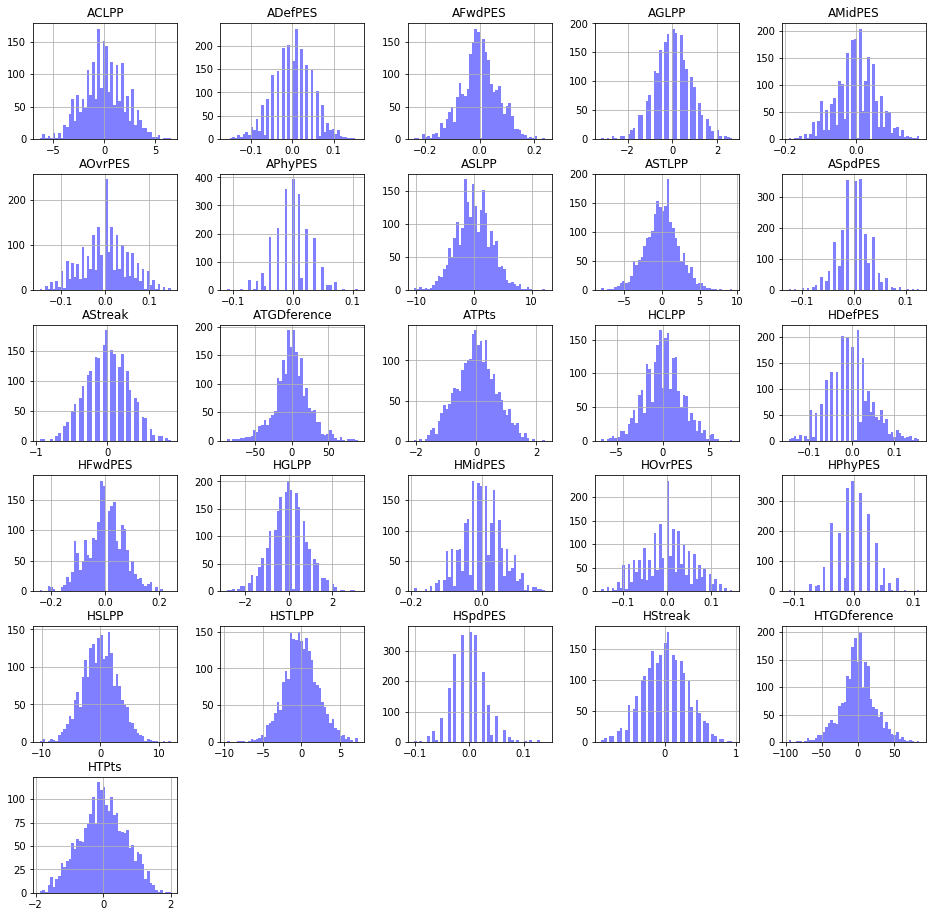

In [9]:
# Visualisasi data "non-diferensial"
X_Train_A.diff().hist(color='blue', alpha=0.5, bins=50, figsize=(16,16))

In [10]:
# Kumpulan fitur yang akan ditambahkan pada Set B yaitu fitur diferensial
Differential_Features = ['DiffCLPP','DiffDefPES','DiffFwdPES','DiffGDference','DiffGLPP','DiffMidPES',
                         'DiffOvrPES','DiffPhyPES','DiffPts','DiffSLPP','DiffSTLPP','DiffSpdPES','DiffStreak']

# Memilih set fitur di atas
X_Train_B = X_Train[Differential_Features]
X_Test_B = X_Test[Differential_Features]

# Tampilkan kolom diferensial
pprint(list(X_Test_B.columns.unique()))

['DiffCLPP',
 'DiffDefPES',
 'DiffFwdPES',
 'DiffGDference',
 'DiffGLPP',
 'DiffMidPES',
 'DiffOvrPES',
 'DiffPhyPES',
 'DiffPts',
 'DiffSLPP',
 'DiffSTLPP',
 'DiffSpdPES',
 'DiffStreak']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A41E1D0>,
      dtype=object)

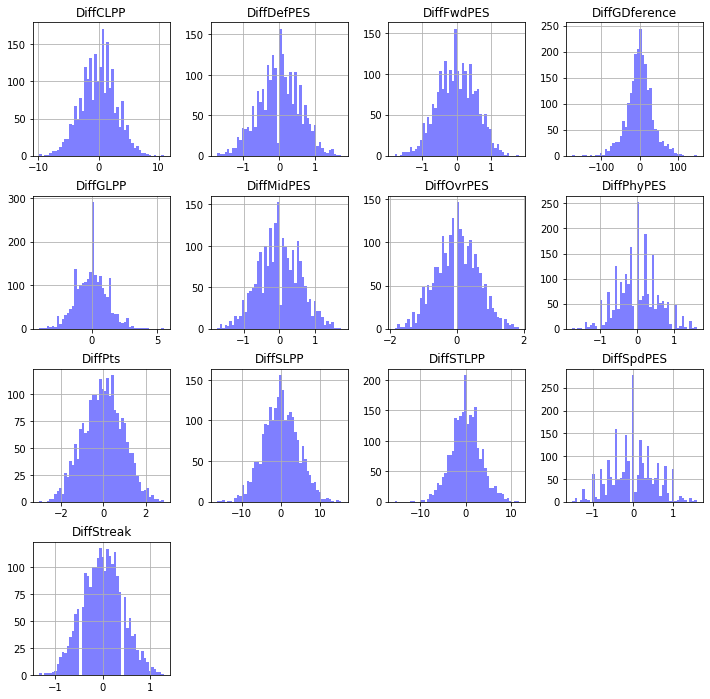

In [11]:
# Visualisasi data "diferensial"
X_Train_B.diff().hist(color='blue', alpha=0.5, bins=50, figsize=(12,12))